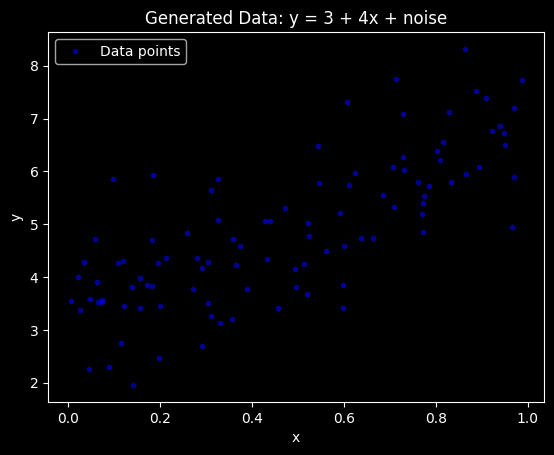

In [1]:
# ===============================
# Step 1: Data Generation
# ===============================

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature  # to add bias (intercept) column

# Set seed for reproducibility (so results are same every run)
np.random.seed(42)

# Number of data points
n = 100

# Generate n random values of x in [0,1]
x = np.random.rand(n, 1)

# True relationship: y = 3 + 4x + noise
# Here, noise ~ N(0,1) makes data more realistic
y = 3 + 4 * x + np.random.randn(n, 1)

# Scatter plot of generated data
plt.plot(x, y, "b.", alpha=0.5, label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data: y = 3 + 4x + noise")
plt.legend()
plt.show()


Theta (Normal Equation): [3.21509616 3.54022677]
Predictions (x=0, x=1): [3.21509616 6.75532293]


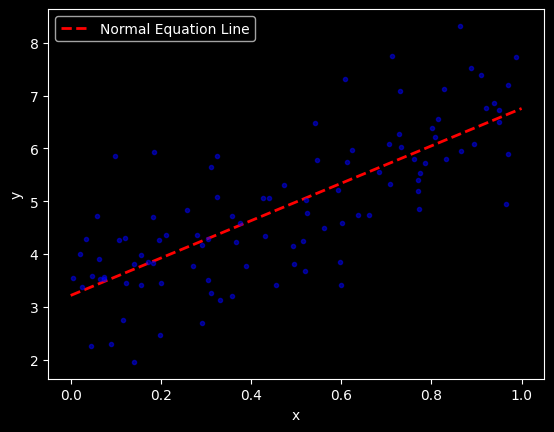

In [2]:
# ===============================
# Step 2: Normal Equation
# ===============================

# Add dummy feature (bias column of ones) to x
# Shape: (n,2) => first column = 1s, second column = x
x_b = add_dummy_feature(x, 1)

# Compute theta using Normal Equation:
# theta = (X^T X)^(-1) X^T y
theta_ne = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
print("Theta (Normal Equation):", theta_ne.ravel())

# Make predictions at new values (x=0, x=1)
x_new = np.array([[0], [1]])
x_new_b = add_dummy_feature(x_new, 1)  # add bias column
y_pred_ne = x_new_b @ theta_ne
print("Predictions (x=0, x=1):", y_pred_ne.ravel())

# Plot regression line vs actual data
plt.plot(x_new, y_pred_ne, "r--", linewidth=2, label="Normal Equation Line")
plt.plot(x, y, "b.", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Intercept (sklearn): [3.21509616]
Slope (sklearn): [[3.54022677]]


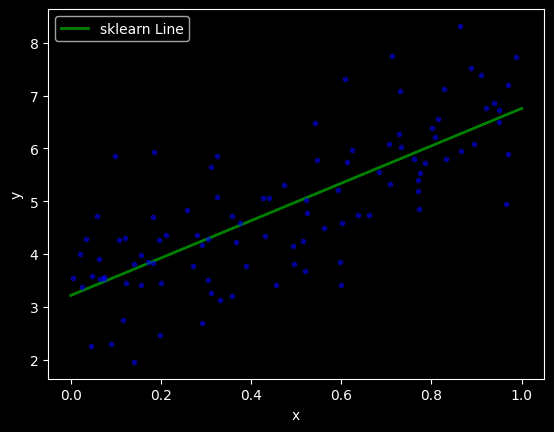

In [3]:
# ===============================
# Step 3: sklearn LinearRegression
# ===============================

from sklearn.linear_model import LinearRegression

# Initialize and fit model
lin_reg = LinearRegression()
lin_reg.fit(x, y)

# Extract coefficients
print("Intercept (sklearn):", lin_reg.intercept_)
print("Slope (sklearn):", lin_reg.coef_)

# Predictions at x=0 and x=1
y_pred_lr = lin_reg.predict(x_new)

# Plot regression line vs actual data
plt.plot(x_new, y_pred_lr, "g-", linewidth=2, label="sklearn Line")
plt.plot(x, y, "b.", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [4]:
# ===============================
# Step 4: Pseudo-Inverse and SVD
# ===============================

# Using lstsq (least squares solution)
theta_lstsq, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=None)
print("Theta (lstsq):", theta_lstsq.ravel())

# Using pseudo-inverse
theta_pinv = np.linalg.pinv(x_b) @ y
print("Theta (Pseudo-Inverse):", theta_pinv.ravel())


Theta (lstsq): [3.21509616 3.54022677]
Theta (Pseudo-Inverse): [3.21509616 3.54022677]


Theta (Gradient Descent): [3.21509628 3.54022653]
Predictions (x=0, x=1): [3.21509628 6.75532281]


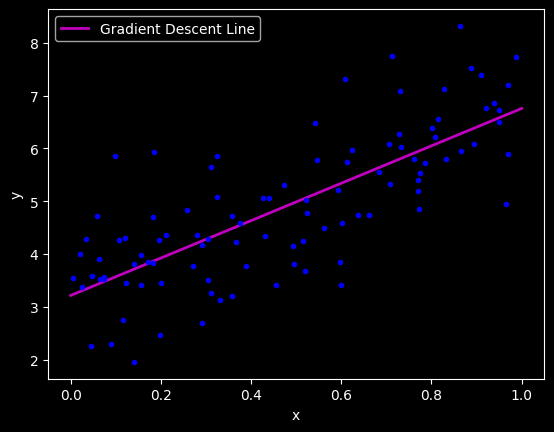

In [5]:
# ===============================
# Step 5: Gradient Descent
# ===============================

# Learning rate (controls step size of updates)
eta = 0.1
# Number of iterations
n_iterations = 1000
# Number of samples
m = len(x_b)

# Initialize theta with random values
theta_gd = np.random.randn(2, 1)

# Iterative updates
for iteration in range(n_iterations):
    # Compute gradient of cost function
    gradients = 2/m * x_b.T @ (x_b @ theta_gd - y)
    # Update theta
    theta_gd = theta_gd - eta * gradients

print("Theta (Gradient Descent):", theta_gd.ravel())

# Predictions
y_pred_gd = x_new_b @ theta_gd
print("Predictions (x=0, x=1):", y_pred_gd.ravel())

# Plot regression line
plt.plot(x_new, y_pred_gd, "m-", linewidth=2, label="Gradient Descent Line")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Intercept (SGD): [3.25636995]
Slope (SGD): [3.42583478]


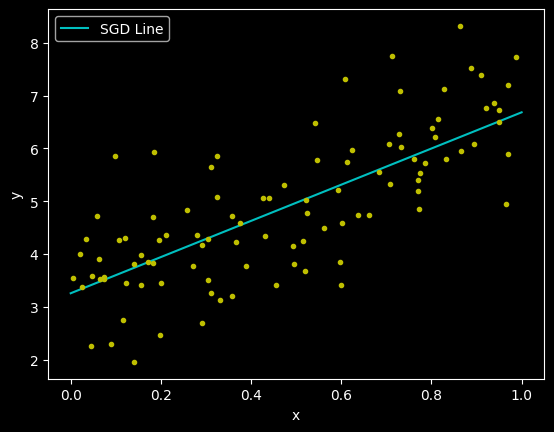

In [6]:
# ===============================
# Step 6: SGDRegressor
# ===============================

from sklearn.linear_model import SGDRegressor

# Initialize SGD model
# penalty=None (no regularization), eta0=0.1 (learning rate)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

# Train model
sgd_reg.fit(x, y.ravel())

# Extract learned coefficients
print("Intercept (SGD):", sgd_reg.intercept_)
print("Slope (SGD):", sgd_reg.coef_)

# Predictions at new points
y_pred_sgd = sgd_reg.predict(x_new)

# Plot regression line
plt.plot(x_new, y_pred_sgd, "c-", label="SGD Line")
plt.plot(x, y, "y.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
